
--- Decision Tree Results ---
R² Score: 0.21440546842328612
MAE: 3.1629694431618463
RMSE: 3.9711152032419474


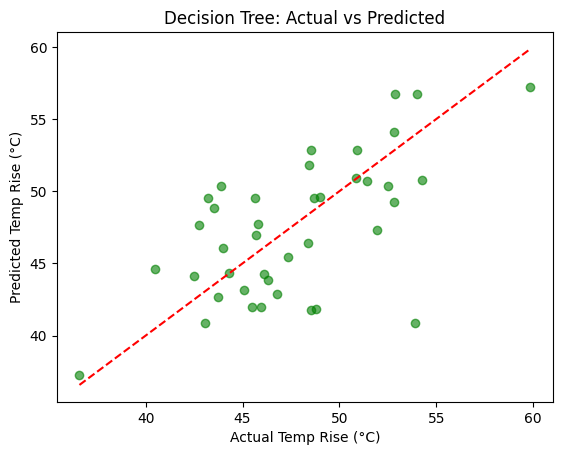


Predicted Temperature Rise for new data: 53.196392110977506 °C


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# ---------------------------
# Step 1: Synthetic Dataset
# ---------------------------
np.random.seed(42)
n_samples = 200

voltage = np.random.uniform(200, 250, n_samples)
current = np.random.uniform(5, 15, n_samples)
ambient_temp = np.random.uniform(20, 35, n_samples)
load = np.random.uniform(50, 100, n_samples)
running_time = np.random.uniform(10, 120, n_samples)

temp_rise = (
    0.05 * voltage +
    0.8 * current +
    0.6 * ambient_temp +
    0.1 * load +
    0.07 * running_time +
    np.random.normal(0, 2, n_samples)
)

df = pd.DataFrame({
    "Voltage": voltage,
    "Current": current,
    "AmbientTemp": ambient_temp,
    "Load": load,
    "RunningTime": running_time,
    "TempRise": temp_rise
})

# ---------------------------
# Step 2: Train/Test Split
# ---------------------------
X = df[["Voltage", "Current", "AmbientTemp", "Load", "RunningTime"]]
y = df["TempRise"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# Step 3: Decision Tree Model
# ---------------------------
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# ---------------------------
# Step 4: Predictions & Evaluation
# ---------------------------
y_pred = tree_model.predict(X_test)

print("\n--- Decision Tree Results ---")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# ---------------------------
# Step 5: Visualization
# ---------------------------
plt.scatter(y_test, y_pred, color="green", alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--")
plt.xlabel("Actual Temp Rise (°C)")
plt.ylabel("Predicted Temp Rise (°C)")
plt.title("Decision Tree: Actual vs Predicted")
plt.show()

# ---------------------------
# Step 6: Predict for New Data
# ---------------------------
new_data = pd.DataFrame({
    "Voltage": [230],
    "Current": [10],
    "AmbientTemp": [30],
    "Load": [80],
    "RunningTime": [60]
})

predicted_temp = tree_model.predict(new_data)
print("\nPredicted Temperature Rise for new data:", predicted_temp[0], "°C")


Comparison Between Linear Regression and Decision Tree Regressor

Accuracy: Linear Regression gave R² ≈ 0.84, which means it explained most of the variation in the data.
Decision Tree gave R² ≈ 0.21, which is much lower, showing that it did not fit the data well.

Errors : Linear Regression had MAE ≈ 1.35 and RMSE ≈ 1.77, which are small errors.
Decision Tree had MAE ≈ 3.16 and RMSE ≈ 3.97, which are larger errors.

Model Nature : Linear Regression is a mathematical equation with coefficients and an intercept to examine the contribution of each feature.
Decision Tree does not have coefficients or an intercept. It works by splitting the data into rules.

Reason for Results:
Our data was created using a linear formula, so Linear Regression matches it more closely and performs better.

Decision Tree is more flexible for non-linear patterns, but here it did not capture the linear relationship well.